In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib

import cv2

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin, skeletonize_3d
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray

from skimage.color import rgb2hsv
from skimage.color import hsv2rgb



from skimage.filters.rank import entropy
import scipy

from skimage import data, filters
import scipy

import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob

from skimage.morphology import disk
from skimage import io

from mpl_toolkits.mplot3d import Axes3D
from skimage import io
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
def get_occurances(markers, points):
    
    
    pt_labels = markers[points[0], points[1], points[2]]

    label_occurances = (np.bincount(pt_labels, weights=np.ones((points.shape[1]))) )[1:]
    
    
    return label_occurances

In [3]:
def pair_labels_W_vals(vals, markers, nummarkers, points):
    
    labels = np.arange(nummarkers)+1
    
    pt_labels = markers[points[0], points[1], points[2]]
    
    dict_1 = dict(zip(labels, vals))
    
    new_labels = np.vectorize(dict_1.get)(pt_labels)
    
    
    markers2 = markers.copy()
    
    markers2[points[0], points[1], points[2]] = new_labels
    
    return markers2

In [4]:
def getNeighbors(arr):
    
    
    
    arr2 = (arr.copy())*0
    
    
    #IN YZ PLANE
    
    #bottom front
    arr2[:-1,:-1] += arr[1:,1:]
    #bottom 
    arr2[:-1] += arr[1:]
    #bottom back
    arr2[:-1, 1:] += arr[1:, :-1]
    
    #top front
    arr2[1:, :-1] += arr[:-1, 1:]
    #top
    arr2[1:] += arr[:-1]
    #top back
    arr2[1:, 1:] += arr[:-1, :-1]
    
    #front
    arr2[:, :-1] += arr[:, 1:]
    #back
    arr2[:, 1:] += arr[:, :-1]
    
    
    
    #LEFT LEFT LEFT LEFT LEFT LEFT LEFT 
    #LEFT LEFT LEFT LEFT LEFT LEFT LEFT
    #LEFT LEFT LEFT LEFT LEFT LEFT LEFT
    
    #bottom front
    arr2[:-1,:-1, 1:] += arr[1:,1:, :-1]
    #bottom 
    arr2[:-1, :, 1:] += arr[1:, :, :-1]
    #bottom back
    arr2[:-1, 1:, 1:] += arr[1:, :-1, :-1]
    
    #top front
    arr2[1:, :-1, 1:] += arr[:-1, 1:, :-1]
    #top
    arr2[1:, :, 1:] += arr[:-1, :, :-1]
    #top back
    arr2[1:, 1:, 1:] += arr[:-1, :-1, :-1]
    
    #front
    arr2[:, :-1, 1:] += arr[:, 1:, :-1]
    #back
    arr2[:, 1:, 1:] += arr[:, :-1, :-1]
    
    #just left 
    arr2[:, :, 1:] += arr[:, :, :-1]
    
    
    
    #RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT
    #RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT
    #RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT
    
    #bottom front
    arr2[:-1,:-1, :-1] += arr[1:,1:, 1:]
    #bottom 
    arr2[:-1, :, :-1] += arr[1:, :, 1:]
    #bottom back
    arr2[:-1, 1:, :-1] += arr[1:, :-1, 1:]
    
    #top front
    arr2[1:, :-1, :-1] += arr[:-1, 1:, 1:]
    #top
    arr2[1:, :, :-1] += arr[:-1, :, 1:]
    #top back
    arr2[1:, 1:, :-1] += arr[:-1, :-1, 1:]
    
    #front
    arr2[:, :-1, :-1] += arr[:, 1:, 1:]
    #back
    arr2[:, 1:, :-1] += arr[:, :-1, 1:]
    
    
    #just right 
    arr2[:, :, :-1] += arr[:, :, 1:]
    
    
    
    return arr2*(arr!=0)

In [5]:
segs = io.imread("/Users/spencerlab/Desktop/Temporary_Computational_Folders/Blood_Vessels/Graph_development/skel_Segs_3D.tif")
nodes = io.imread("/Users/spencerlab/Desktop/Temporary_Computational_Folders/Blood_Vessels/Graph_development/skel_Nodes_3D.tif")

im =io.imread("/Users/spencerlab/Desktop/final_files/Day_3/#1/Blood_Vessel/Blood_vessel_day_3.tif")

In [6]:
markers, nummarkers = ndi.label(segs!=0) 
    
points = np.where(segs!=0)
points = np.asarray(points)

In [7]:
seg_occ = get_occurances(markers, points)

In [8]:
length_segmap = pair_labels_W_vals(seg_occ, markers, nummarkers, points)

In [9]:
segs_2 = (length_segmap>1)
endpoints = getNeighbors(segs_2!=0) == 1

In [10]:
markers_2, nummarkers_2 = ndi.label(segs_2!=0) 
points_2 = np.where(segs_2!=0)
points_2 = np.asarray(points_2)


end_pts = np.where(endpoints!=0)
end_pts = np.asarray(end_pts)

end_occ = get_occurances(markers_2, end_pts)

num_endpt_map = pair_labels_W_vals(end_occ, markers_2, nummarkers_2, points_2)

length_segmap_2 = (segs_2!=0)*length_segmap

In [11]:
LENGTH_PRUNING_THRESH = 5
final_skeleton_segs = segs_2*( (num_endpt_map==1)*(length_segmap_2>=LENGTH_PRUNING_THRESH) + (num_endpt_map==2) )

In [13]:
#REMOVE EXCESS NODE PIXELS
#REMOVE EXCESS NODE PIXELS
#REMOVE EXCESS NODE PIXELS
#REMOVE EXCESS NODE PIXELS

newskel = 1*(final_skeleton_segs!=0)+1*(nodes!=0)
newskel = skeletonize_3d(newskel)




/Users/spencerlab/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:137: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:190: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [14]:
nodes_2 = nodes*newskel

In [16]:
skeleton3 = (nodes_2!=0)*1 + (final_skeleton_segs!=0)*1

In [18]:
skeleton3_nebs = getNeighbors(skeleton3)

In [35]:
labels_2 = watershed(-distance, markers, mask=im)

In [36]:
disp_im_1= Image.fromarray( (labels_2[0]).astype('uint16'))
disp_im_1.save('/Users/spencerlab/Desktop/Temporary_Computational_Folders/Blood_Vessels/Graph_development/lab-vessel-sample-2.tif')

In [19]:
distance = ndi.distance_transform_edt(im!=0)

In [20]:
skel_segs_markers, skel_segs_nummarkers = ndi.label(skeleton3_nebs)

In [21]:
labels = watershed(-distance, skel_segs_markers, mask=im)

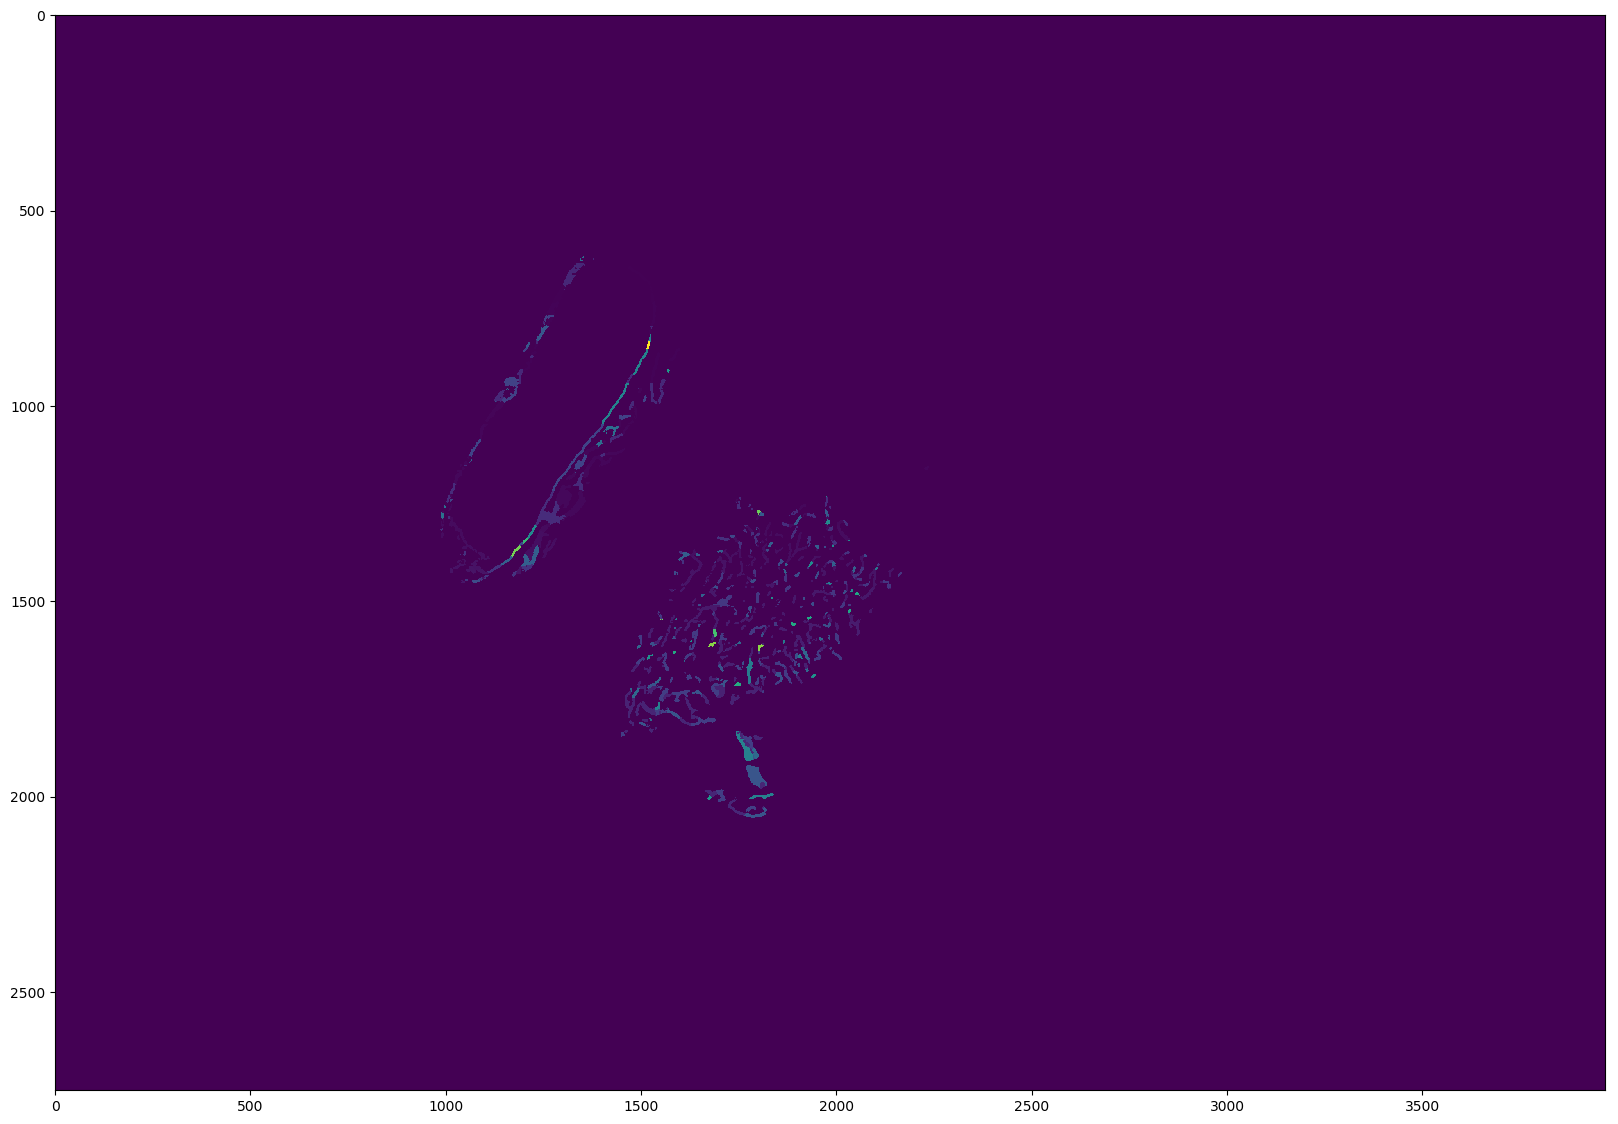

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(labels[0])


In [23]:
labels[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [32]:
disp_im = Image.fromarray( (labels[0]).astype('uint16'))

In [34]:
disp_im.save('/Users/spencerlab/Desktop/Temporary_Computational_Folders/Blood_Vessels/Graph_development/lab-vessel-sample.tif')

In [33]:
disp_im.show()

In [28]:
np.unique(labels[0])

array([   0,    1,    2, ..., 4988, 5601, 6032], dtype=int32)

In [31]:
np.unique((labels[0]).astype('uint16'))

array([   0,    1,    2, ..., 4988, 5601, 6032], dtype=uint16)

In [37]:
unk_markers = np.unique(markers)

In [38]:
unk_lebals = np.unique(labels)

In [39]:
unk_markers

array([      0,       1,       2, ..., 1787691, 1787692, 1787693])

In [40]:
unk_lebals

array([     0,      1,      2, ..., 528786, 528787, 528788], dtype=int32)